* Load UFO data
    * Deal with messed up lines
    
```py
inpath = 'data/ufo/ufo_awesome.tsv'
inf = open(inpath, 'r')

for i, line in enumerate(inf):
    splitline = line.split('\\t')
    if len(splitline) != 6:
        first_bad_line = splitline
        print "First bad row:", i
        for j, col in enumerate(first_bad_line):
            print j, col
        break

inf.close()
```

* deal with headers
* convert dates and index
* split city and state
* get a histogram

```py
post90_count = ufo_us.groupby('date_occurred')['date_occurred'].count()
plt.figure()
post90_count.plot()
plt.title('Number of U.S. UFO sightings\\nJanuary 1990 through August 2010')
plt.savefig('post90_count_ts.png')
```

* Reshape data: http://slendermeans.org/ml4h-ch1-p4.html


In [4]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
col_names = ["date_occurred", "date_reported", "location", "short_desc", "duration", "description"]
ufo = pd.read_csv("ufo_awesome.tsv", sep="\t", names=col_names, na_values=["0000"], dtype=str)

In [7]:
ufo.head()

,date_occurred,date_reported,location,short_desc,duration,description
0,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
2,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
3,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
4,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [9]:
ufo.tail()

,date_occurred,date_reported,location,short_desc,duration,description
61388,20090424,20100820,"Hartwell, GA",oval,10 min,never seen anything like it.i was drivivg home...
61389,20100821,20100826,"Franklin Square, NY",fireball,20 minutes,multiple fireballs in sky over long islandat 1...
61390,20100827,20100827,"Brighton, CO",circle,at lest 45 min,"Very bright flashing in a pattern of red, whit..."
61391,20100818,20100821,"Dryden (Canada), ON",other,5 Min. maybe more,"Long steal pipe shaped object with No Wings, a..."
61392,20050502,20100824,"Fort Knox, KY",triangle,15 seconds,Flash of light made me look up to see a dark c...


In [10]:
ufo[ufo['date_occurred'].isnull()].head()

,date_occurred,date_reported,location,short_desc,duration,description
948,NaN,19951218,"Chattanooga, TN",NaN,NaN,He called seeking information regarding the UF...
1351,NaN,19970410,"Near Randle, WA",light,45 Seconds,Summary : Large bright object moving horizonta...
1391,NaN,19970810,"Escondido (Suburbs of Eden Valley), CA",unknown,5-7 min,Summary : Approx 2200 an auto sized bright blu...
1397,NaN,19971019,"Warren, OH",unknown,3 minutes,Summary : About 100 feet from the ground. Hove...
1501,NaN,19971005,"Rohnert Park, CA",rectangle,1 minute,Summary : Saw black monolith type objectI was ...


In [11]:
pd.to_datetime(ufo['date_occurred'], format="%Y%m%d")

ValueError: time data '19940000' does not match format '%Y%m%d' (match)

In [8]:
ufo.index = pd.to_datetime(ufo['date_reported'], format="%Y%m%d")

In [9]:
ufo.head()

,date_occurred,date_reported,location,short_desc,duration,description
date_reported,,,,,,
1995-10-09,19951009,19951009,"Iowa City, IA",NaN,NaN,"Man repts. witnessing &quot;flash, followed by..."
1995-10-11,19951010,19951011,"Milwaukee, WI",NaN,2 min.,"Man on Hwy 43 SW of Milwaukee sees large, bri..."
1995-01-03,19950101,19950103,"Shelton, WA",NaN,NaN,Telephoned Report:CA woman visiting daughter w...
1995-05-10,19950510,19950510,"Columbia, MO",NaN,2 min.,Man repts. son&apos;s bizarre sighting of smal...
1995-06-14,19950611,19950614,"Seattle, WA",NaN,NaN,Anonymous caller repts. sighting 4 ufo&apos;s ...


In [10]:
ufo = ufo[["date_occurred", "location", "duration"]]

In [11]:
ufo.head()

,date_occurred,location,duration
date_reported,,,
1995-10-09,19951009,"Iowa City, IA",NaN
1995-10-11,19951010,"Milwaukee, WI",2 min.
1995-01-03,19950101,"Shelton, WA",NaN
1995-05-10,19950510,"Columbia, MO",2 min.
1995-06-14,19950611,"Seattle, WA",NaN


In [12]:
import re

In [13]:
location_regex = re.compile(r"\s*(.+), ([A-Z]{2})\s*$")

In [14]:
m = location_regex.match("Durham, NC")

In [15]:
m.groups()

('Durham', 'NC')

In [16]:
location_regex.match("Los Alamos, NM").groups()

('Los Alamos', 'NM')

In [17]:
location_regex.match("Coeur d'Alene, ID").groups()

("Coeur d'Alene", 'ID')

In [18]:
location_regex.match("Los Alamos, NMX").groups()

AttributeError: 'NoneType' object has no attribute 'groups'

In [24]:
location_regex.match("Los Alamos, NM, USA").groups()

AttributeError: 'NoneType' object has no attribute 'groups'

In [20]:
def extract_city_state(loc):
    location_regex = re.compile(r"\s*(.+), ([A-Z]{2})\s*$")
    try:
        match = location_regex.match(loc)
    except TypeError:
        match = None
        
    if match:
        city, state = match.groups()
    else:
        city, state = (None, None)
        
    return city, state        

In [21]:
locations = ufo.location.map(extract_city_state)

In [22]:
locations[:5]

date_reported
1995-10-09    (Iowa City, IA)
1995-10-11    (Milwaukee, WI)
1995-01-03      (Shelton, WA)
1995-05-10     (Columbia, MO)
1995-06-14      (Seattle, WA)
Name: location, dtype: object

In [4]:
list(locations)[:5]

NameError: name 'locations' is not defined

In [23]:
ufo["city"] = [city for city, state in locations]

In [24]:
ufo["state"] = [state for city, state in locations]
ufo.head()

,date_occurred,location,duration,city,state
date_reported,,,,,
1995-10-09,19951009,"Iowa City, IA",NaN,Iowa City,IA
1995-10-11,19951010,"Milwaukee, WI",2 min.,Milwaukee,WI
1995-01-03,19950101,"Shelton, WA",NaN,Shelton,WA
1995-05-10,19950510,"Columbia, MO",2 min.,Columbia,MO
1995-06-14,19950611,"Seattle, WA",NaN,Seattle,WA


In [26]:
def extract_year(date_str):
    try:
        match = re.search(r"^\d{4}", date_str)
    except TypeError:
        return None
    
    if match:
        return match.group(0)

ufo['year'] = ufo.date_occurred.map(extract_year)

In [27]:
ufo.head()

,date_occurred,location,duration,city,state,year
date_reported,,,,,,
1995-10-09,19951009,"Iowa City, IA",NaN,Iowa City,IA,1995
1995-10-11,19951010,"Milwaukee, WI",2 min.,Milwaukee,WI,1995
1995-01-03,19950101,"Shelton, WA",NaN,Shelton,WA,1995
1995-05-10,19950510,"Columbia, MO",2 min.,Columbia,MO,1995
1995-06-14,19950611,"Seattle, WA",NaN,Seattle,WA,1995


In [28]:
ufo = ufo[["date_occurred", "city", "state", "year"]]

In [29]:
ufo.tail()

,date_occurred,city,state,year
date_reported,,,,
2010-08-20,20090424,Hartwell,GA,2009
2010-08-26,20100821,Franklin Square,NY,2010
2010-08-27,20100827,Brighton,CO,2010
2010-08-21,20100818,Dryden (Canada),ON,2010
2010-08-24,20050502,Fort Knox,KY,2005


In [39]:
ufo.date_occurred.groupby(ufo.state).count()

state
AB     287
AK     234
AL     497
AR     529
AZ    2099
BC     739
CA    7569
CO    1167
CT     615
DC      93
DE     126
FL    2828
GA     985
HI     240
IA     493
ID     361
IL    2057
IN    1050
KS     507
KY     687
LA     454
MA     906
MB     123
MD     610
ME     411
MI    1546
MN     753
MO    1198
MS     320
MT     349
      ... 
NS     129
NT      22
NV     716
NY    2403
OH    1678
OK     556
ON    1168
OR    1409
PA    1800
PE      21
PQ     100
PR      36
QC     122
RI     193
SA      39
SC     585
SD     142
SK      75
TN     870
TX    3010
UT     474
VA     914
VI       1
VT     173
WA    3338
WI     908
WV     342
WY     167
YK       7
YT      12
Name: date_occurred, dtype: int64

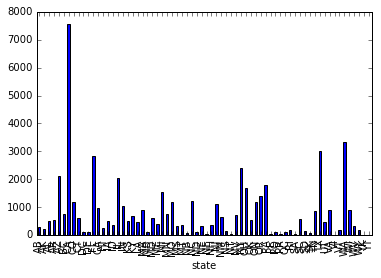

In [44]:
ufo.date_occurred.groupby(ufo.state).count().plot(kind="bar")

In [30]:
ufo.date_occurred.groupby(ufo.index).count()

date_reported
1905-06-23     2
1995-01-01     3
1995-01-02     1
1995-01-03     8
1995-01-04     3
1995-01-05     4
1995-01-06     1
1995-01-07     4
1995-01-08     1
1995-01-09     2
1995-01-10     1
1995-01-11     1
1995-01-12     2
1995-01-13     2
1995-01-14     1
1995-01-15     2
1995-01-16     1
1995-01-17     3
1995-01-18     3
1995-01-20     3
1995-01-21     1
1995-01-22     2
1995-01-23     4
1995-01-24     5
1995-01-25     2
1995-01-26     1
1995-01-27     2
1995-01-28     1
1995-01-29     1
1995-01-30     3
              ..
2010-08-01    21
2010-08-02    14
2010-08-03    17
2010-08-04    15
2010-08-05    18
2010-08-06    25
2010-08-07    21
2010-08-08    13
2010-08-09    20
2010-08-10    26
2010-08-11    15
2010-08-12    25
2010-08-13    20
2010-08-14    25
2010-08-15    20
2010-08-16    17
2010-08-17    19
2010-08-18     9
2010-08-19    14
2010-08-20    16
2010-08-21    22
2010-08-22    17
2010-08-23    16
2010-08-24    18
2010-08-25    15
2010-08-26    23
2010-08-27    24


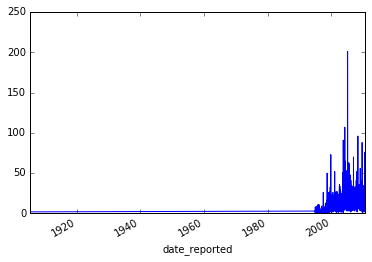

In [33]:
ufo.date_occurred.groupby(ufo.index).count().plot()

In [34]:
post1990 = ufo.drop(datetime.date(1905, 6, 23), axis=0)

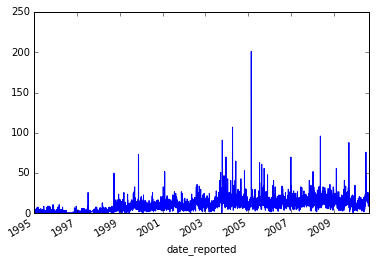

In [35]:
post1990.date_occurred.groupby(post1990.index).count().plot()

/Users/clinton/Projects/regex_lesson/.direnv/python-3.5.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


TypeError: float() argument must be a string or a number, not 'pandas._period.Period'

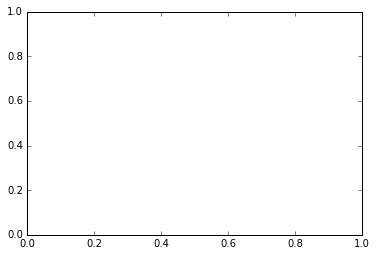

In [36]:
post1990.date_occurred.resample("Q", how=["count"]).plot()

In [37]:
post1990.index.to_series().map(lambda d: d.weekday())

date_reported
1995-10-09    0
1995-10-11    2
1995-01-03    1
1995-05-10    2
1995-06-14    2
1995-10-24    1
1995-04-19    2
1995-09-11    0
1995-02-14    1
1995-09-15    4
1995-02-20    0
1995-07-24    0
1995-06-12    0
1995-08-23    2
1995-04-16    6
1995-02-07    1
1995-11-17    4
1995-06-11    6
1995-05-14    6
1995-02-04    5
1995-09-11    0
1995-11-06    0
1995-06-28    2
1995-03-14    1
1995-03-07    1
1995-05-16    1
1995-07-30    6
1995-08-22    1
1995-02-07    1
1995-09-10    6
             ..
2010-08-13    4
2010-08-21    5
2010-08-26    3
2010-08-10    1
2010-08-27    4
2010-08-07    5
2010-08-19    3
2010-08-12    3
2010-08-21    5
2010-08-10    1
2010-08-29    6
2010-08-19    3
2010-08-13    4
2010-08-27    4
2010-08-08    6
2010-08-12    3
2010-08-10    1
2010-08-14    5
2010-08-12    3
2010-08-17    1
2010-08-10    1
2010-08-26    3
2010-08-28    5
2010-08-27    4
2010-08-28    5
2010-08-20    4
2010-08-26    3
2010-08-27    4
2010-08-21    5
2010-08-24    1
Name: date

In [59]:
dow = ["Su", "M", "Tu", "W", "Th", "F", "Sa"]
post1990["day_of_week"] = post1990.index.to_series().map(lambda d: d.weekday())

In [60]:
post1990.head()

,date_occurred,city,state,day_of_week
date_reported,,,,
1995-10-09,19951009,Iowa City,IA,0
1995-10-11,19951010,Milwaukee,WI,2
1995-01-03,19950101,Shelton,WA,1
1995-05-10,19950510,Columbia,MO,2
1995-06-14,19950611,Seattle,WA,2


In [62]:
post1990.day_of_week.value_counts().sort_index()

0    9502
1    8996
2    8629
3    8754
4    8029
5    8486
6    8995
dtype: int64

In [63]:
data = post1990.day_of_week.value_counts().sort_index()

In [64]:
data.index = dow

In [66]:
data

Su    9502
M     8996
Tu    8629
W     8754
Th    8029
F     8486
Sa    8995
dtype: int64

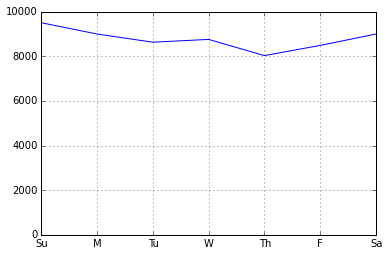

In [67]:
data.plot(ylim=(0, 10000))

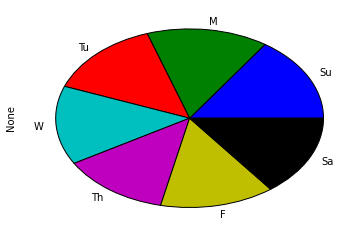

In [68]:
data.plot(kind="pie")

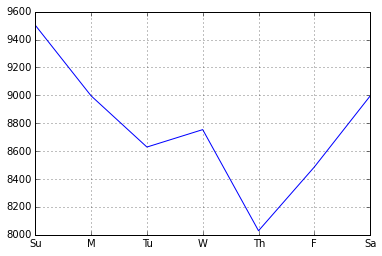

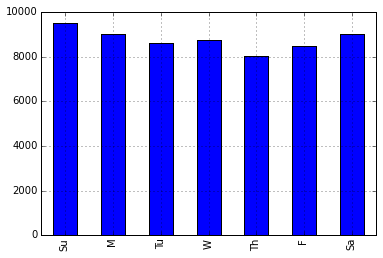

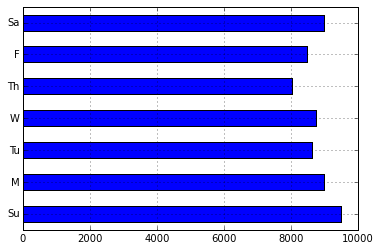

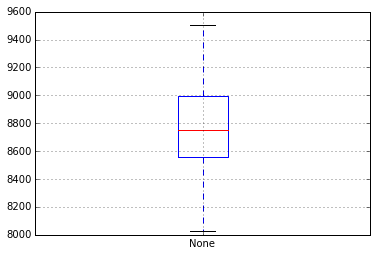

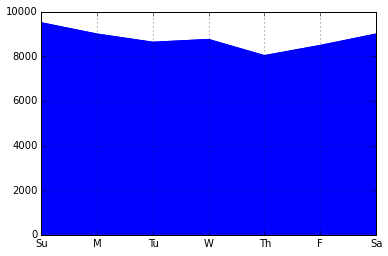

In [74]:
for kind in ['line', 'bar', 'barh', 'box', 'area']:
    data.plot(kind=kind)
    plt.show()

In [73]:
help(data.plot)

Help on method plot_series in module pandas.tools.plotting:

plot_series(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds) method of pandas.core.series.Series instance
    Make plots of Series using matplotlib / pylab.
    
    Parameters
    ----------
    data : Series
    
    kind : str
        - 'line' : line plot (default)
        - 'bar' : vertical bar plot
        - 'barh' : horizontal bar plot
        - 'hist' : histogram
        - 'box' : boxplot
        - 'kde' : Kernel Density Estimation plot
        - 'density' : same as 'kde'
        - 'area' : area plot
        - 'pie' : pie plot
        
    ax : matplotlib axes object
        If not passed, uses gca()
    figsize : a tuple (width, height) in inches
    use_index : boolean,